# CSE 572: Homework 1

This notebook provides a template and starting code to implement Part 2 of the Homework 1 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

Name - Swarali Chine

ASU ID - 1222583687

## Prepare the dataset

You will use the [Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult) for Part 2 of the Homework 1 assignment. The task for this dataset is to predict whether an individual's income exceeds $50,000 per year or not based on a set of attributes/features (including age, occupation, education, and other factors). The dataset was constructed from the 1994 US Census database.

In [32]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'class']

data = data.drop(['fnlwgt', 'education-num'], axis=1)

data = data.replace(' ?', np.nan)

data.sample(10)

age          workclass      education       marital-status  \
29339   44            Private        5th-6th   Married-civ-spouse   
18483   28            Private      Doctorate        Never-married   
2350    34            Private     Assoc-acdm             Divorced   
26376   23            Private   Some-college        Never-married   
7157    18            Private           10th        Never-married   
2780    59            Private   Some-college   Married-civ-spouse   
27444   28            Private        7th-8th   Married-civ-spouse   
9043    21            Private   Some-college        Never-married   
7044    30            Private           11th   Married-civ-spouse   
2429    36   Self-emp-not-inc        HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  capital-gain  \
29339   Machine-op-inspct         Husband   Black     Male             0   
18483      Prof-specialty   Not-in-family   White     Male           594   
2350      Exec-managerial   Not-in-family   White   Female             0   
26376        Craft-repair       Own-child   White     Male             0   
7157    Machine-op-inspct       Own-child   White     Male             0   
2780       Prof-specialty         Husband   White     Male             0   
27444     Farming-fishing         Husband   White     Male             0   
9043      Priv-house-serv       Own-child   White   Female             0   
7044                Sales         Husband   White     Male             0   
2429      Farming-fishing         Husband   White     Male             0   

       capital-loss  hours-per-week  native-country   class  
29339             0              40   United-States   <=50K  
18483             0              50         Germany   <=50K  
2350              0              45   United-States   <=50K  
26376             0              40   United-States   <=50K  
7157              0              30   United-States   <=50K  
2780              0              34   United-States   <=50K  
27444             0              40          Mexico   <=50K  
9043              0              40   United-States   <=50K  
7044              0              40   United-States   <=50K  
2429              0              84   United-States   <=50K

In [33]:
data.shape

(32561, 13)

In [34]:
# YOUR CODE HERE
# We first drop records with null values
df = data.copy()
df.dropna(inplace=True)

In [35]:
#then we drop the duplicated rows
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(inplace=True, drop=True)
df

age          workclass      education       marital-status  \
0       39          State-gov      Bachelors        Never-married   
1       50   Self-emp-not-inc      Bachelors   Married-civ-spouse   
2       38            Private        HS-grad             Divorced   
3       53            Private           11th   Married-civ-spouse   
4       28            Private      Bachelors   Married-civ-spouse   
...    ...                ...            ...                  ...   
26899   53            Private        Masters   Married-civ-spouse   
26900   22            Private   Some-college        Never-married   
26901   27            Private     Assoc-acdm   Married-civ-spouse   
26902   58            Private        HS-grad              Widowed   
26903   52       Self-emp-inc        HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  capital-gain  \
0            Adm-clerical   Not-in-family   White     Male          2174   
1         Exec-managerial         Husband   White     Male             0   
2       Handlers-cleaners   Not-in-family   White     Male             0   
3       Handlers-cleaners         Husband   Black     Male             0   
4          Prof-specialty            Wife   Black   Female             0   
...                   ...             ...     ...      ...           ...   
26899     Exec-managerial         Husband   White     Male             0   
26900     Protective-serv   Not-in-family   White     Male             0   
26901        Tech-support            Wife   White   Female             0   
26902        Adm-clerical       Unmarried   White   Female             0   
26903     Exec-managerial            Wife   White   Female         15024   

       capital-loss  hours-per-week  native-country   class  
0                 0              40   United-States   <=50K  
1                 0              13   United-States   <=50K  
2                 0              40   United-States   <=50K  
3                 0              40   United-States   <=50K  
4                 0              40            Cuba   <=50K  
...             ...             ...             ...     ...  
26899             0              40   United-States    >50K  
26900             0              40   United-States   <=50K  
26901             0              38   United-States   <=50K  
26902             0              40   United-States   <=50K  
26903             0              40   United-States    >50K  

[26904 rows x 13 columns]

In [36]:
# we then encode the categorical columns
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

cols = ['workclass', 'education', 'marital-status', 'occupation','relationship','race','sex','native-country']
encoder = ce.BinaryEncoder(cols=cols,return_df=True)
df = encoder.fit_transform(df) 

labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])

df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


age  workclass_0  workclass_1  workclass_2  education_0  education_1  \
0       39            0            0            1            0            0   
1       50            0            1            0            0            0   
2       38            0            1            1            0            0   
3       53            0            1            1            0            0   
4       28            0            1            1            0            0   
...    ...          ...          ...          ...          ...          ...   
26899   53            0            1            1            0            0   
26900   22            0            1            1            0            0   
26901   27            0            1            1            0            0   
26902   58            0            1            1            0            0   
26903   52            1            1            0            0            0   

       education_2  education_3  education_4  marital-status_0  ...  \
0                0            0            1                 0  ...   
1                0            0            1                 0  ...   
2                0            1            0                 0  ...   
3                0            1            1                 0  ...   
4                0            0            1                 0  ...   
...            ...          ...          ...               ...  ...   
26899            1            0            0                 0  ...   
26900            1            1            0                 0  ...   
26901            1            1            1                 0  ...   
26902            0            1            0                 1  ...   
26903            0            1            0                 0  ...   

       capital-gain  capital-loss  hours-per-week  native-country_0  \
0              2174             0              40                 0   
1                 0             0              13                 0   
2                 0             0              40                 0   
3                 0             0              40                 0   
4                 0             0              40                 0   
...             ...           ...             ...               ...   
26899             0             0              40                 0   
26900             0             0              40                 0   
26901             0             0              38                 0   
26902             0             0              40                 0   
26903         15024             0              40                 0   

       native-country_1  native-country_2  native-country_3  native-country_4  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 1   
...                 ...               ...               ...               ...   
26899                 0                 0                 0                 0   
26900                 0                 0                 0                 0   
26901                 0                 0                 0                 0   
26902                 0                 0                 0                 0   
26903                 0                 0                 0                 0   

       native-country_5  class  
0                     1      0  
1                     1      0  
2                     1      0  
3                     1      0  
4                     0      0  
...                 ...    ...  
26899                 1      1  
26900                 1      0  
26901                 1      0  
26902                 1      0  
26903           

In [37]:
# we then standardise  the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df.drop(columns='class').columns

Y = df['class']
X = df.drop(columns='class')
X_scaled = scaler.fit_transform(X) 
X_scaled

array([[-0.0037061 , -0.41826998, -2.32633204, ..., -0.25946593,
        -0.19992268,  0.21427137],
       [ 0.83035992, -0.41826998,  0.42986125, ..., -0.25946593,
        -0.19992268,  0.21427137],
       [-0.07953028, -0.41826998,  0.42986125, ..., -0.25946593,
        -0.19992268,  0.21427137],
       ...,
       [-0.91359629, -0.41826998,  0.42986125, ..., -0.25946593,
        -0.19992268,  0.21427137],
       [ 1.43695338, -0.41826998,  0.42986125, ..., -0.25946593,
        -0.19992268,  0.21427137],
       [ 0.98200828,  2.39080031,  0.42986125, ..., -0.25946593,
        -0.19992268,  0.21427137]])

In [38]:
Y.shape

(26904,)

In [39]:
X_scaled.shape

(26904, 33)

In [40]:
df_scaled = pd.DataFrame(X_scaled, columns = columns)
df_scaled.insert(len(df_scaled.columns), "class", Y, False)
df_scaled

age  workclass_0  workclass_1  workclass_2  education_0  \
0     -0.003706     -0.41827    -2.326332     0.442718    -0.074626   
1      0.830360     -0.41827     0.429861    -2.258775    -0.074626   
2     -0.079530     -0.41827     0.429861     0.442718    -0.074626   
3      1.057832     -0.41827     0.429861     0.442718    -0.074626   
4     -0.837772     -0.41827     0.429861     0.442718    -0.074626   
...         ...          ...          ...          ...          ...   
26899  1.057832     -0.41827     0.429861     0.442718    -0.074626   
26900 -1.292717     -0.41827     0.429861     0.442718    -0.074626   
26901 -0.913596     -0.41827     0.429861     0.442718    -0.074626   
26902  1.436953     -0.41827     0.429861     0.442718    -0.074626   
26903  0.982008      2.39080     0.429861    -2.258775    -0.074626   

       education_1  education_2  education_3  education_4  marital-status_0  \
0        -0.426944    -0.790713    -1.456777     1.420982         -0.293667   
1        -0.426944    -0.790713    -1.456777     1.420982         -0.293667   
2        -0.426944    -0.790713     0.686447    -0.703739         -0.293667   
3        -0.426944    -0.790713     0.686447     1.420982         -0.293667   
4        -0.426944    -0.790713    -1.456777     1.420982         -0.293667   
...            ...          ...          ...          ...               ...   
26899    -0.426944     1.264682    -1.456777    -0.703739         -0.293667   
26900    -0.426944     1.264682     0.686447    -0.703739         -0.293667   
26901    -0.426944     1.264682     0.686447     1.420982         -0.293667   
26902    -0.426944    -0.790713     0.686447    -0.703739          3.405217   
26903    -0.426944    -0.790713     0.686447    -0.703739         -0.293667   

       ...  capital-gain  capital-loss  hours-per-week  native-country_0  \
0      ...      0.122818     -0.231413       -0.094321         -0.091835   
1      ...     -0.155719     -0.231413       -2.281159         -0.091835   
2      ...     -0.155719     -0.231413       -0.094321         -0.091835   
3      ...     -0.155719     -0.231413       -0.094321         -0.091835   
4      ...     -0.155719     -0.231413       -0.094321         -0.091835   
...    ...           ...           ...             ...               ...   
26899  ...     -0.155719     -0.231413       -0.094321         -0.091835   
26900  ...     -0.155719     -0.231413       -0.094321         -0.091835   
26901  ...     -0.155719     -0.231413       -0.256309         -0.091835   
26902  ...     -0.155719     -0.231413       -0.094321         -0.091835   
26903  ...      1.769181     -0.231413       -0.094321         -0.091835   

       native-country_1  native-country_2  native-country_3  native-country_4  \
0             -0.168876         -0.205978         -0.259466         -0.199923   
1             -0.168876         -0.205978         -0.259466         -0.199923   
2             -0.168876         -0.205978         -0.259466         -0.199923   
3             -0.168876         -0.205978         -0.259466         -0.199923   
4             -0.168876         -0.205978         -0.259466          5.001934   
...                 ...               ...               ...               ...   
26899         -0.168876         -0.205978         -0.259466         -0.199923   
26900         -0.168876         -0.205978         -0.259466         -0.199923   
26901         -0.168876         -0.205978         -0.259466         -0.199923   
26902         -0.168876         -0.205978         -0.259466         -0.199923   
26903         -0.168876         -0.205978         -0.259466         -0.199923   

       native-country_5  class  
0              0.214271      0  
1              0.214271      0  
2              0.214271      0  
3              0.214271      0  
4             -4.666979      0  
...                 ...    ...  
26899          0.214271      1  
26900          0.214271      0  
26901          0.214271    

In [41]:
from sklearn.model_selection import train_test_split
Y = df_scaled['class']
X = df_scaled.drop(columns='class')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=0, test_size=0.3) 

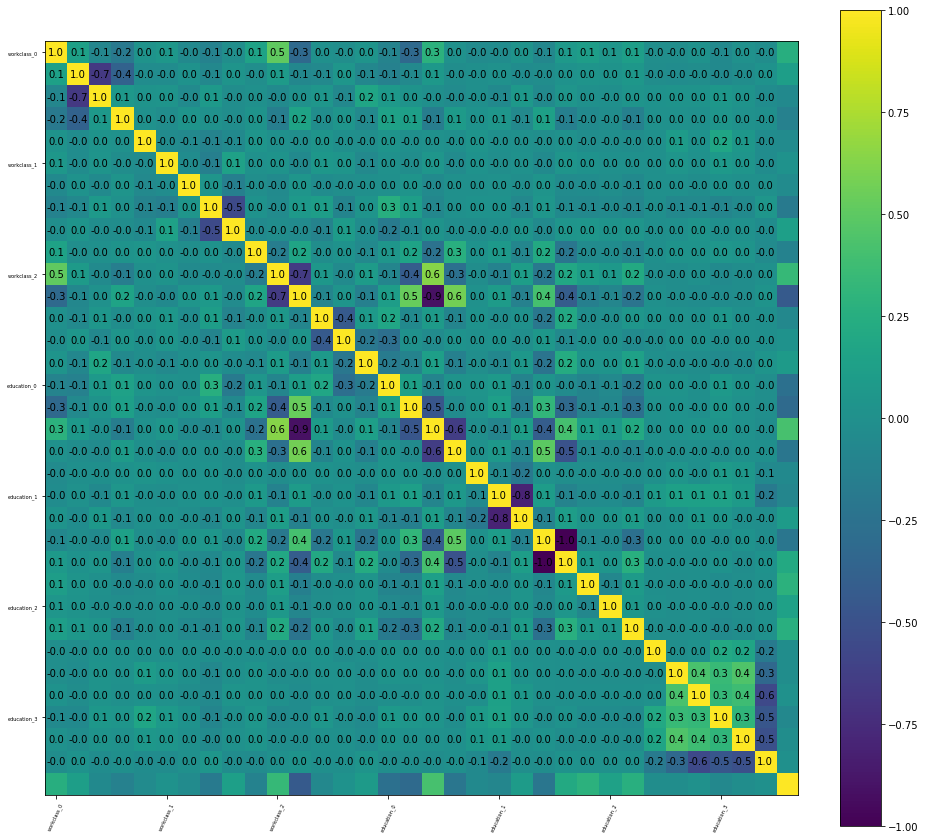

In [42]:
# we know find the correlation between columns
import matplotlib.pyplot as plt
corr = df_scaled.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)
ax.set_xticklabels(df_scaled.columns, rotation=65, fontsize=5)
ax.set_yticklabels(df_scaled.columns, rotation=0, fontsize=5)
for i in range(len(df_scaled.columns)-1):
    for j in range(len(df_scaled.columns)-1):
        text = ax.text(j, i, round(corr.to_numpy()[i, j], 1),
                       ha="center", va="center", color="black")

plt.show()

In [43]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr 

In [44]:
# in this step we drop one of the highly correlated columns in each set
corr_features = correlation(X_train, 0.6)
print("The features to drop are: ",corr_features)
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train 

The features to drop are:  {'relationship_1', 'relationship_2', 'race_2', 'sex_1', 'marital-status_2', 'workclass_1'}


age  workclass_0  workclass_2  education_0  education_1  \
24245  0.072118     -0.41827    -2.258775    -0.074626    -0.426944   
23178 -1.141069     -0.41827     0.442718    -0.074626    -0.426944   
15300 -0.610300     -0.41827     0.442718    -0.074626    -0.426944   
14208  0.830360     -0.41827     0.442718    -0.074626    -0.426944   
6551  -0.761948     -0.41827     0.442718    -0.074626    -0.426944   
...         ...          ...          ...          ...          ...   
13123  0.754536     -0.41827     0.442718    -0.074626    -0.426944   
19648  1.664426     -0.41827     0.442718    -0.074626     2.342225   
9845  -0.761948     -0.41827     0.442718    -0.074626    -0.426944   
10799 -0.534475     -0.41827     0.442718    -0.074626    -0.426944   
2732  -0.155354     -0.41827     0.442718    -0.074626    -0.426944   

       education_2  education_3  education_4  marital-status_0  \
24245    -0.790713     0.686447    -0.703739         -0.293667   
23178    -0.790713     0.686447    -0.703739         -0.293667   
15300    -0.790713     0.686447    -0.703739         -0.293667   
14208    -0.790713     0.686447    -0.703739         -0.293667   
6551     -0.790713    -1.456777     1.420982         -0.293667   
...            ...          ...          ...               ...   
13123     1.264682     0.686447    -0.703739         -0.293667   
19648     1.264682     0.686447     1.420982          3.405217   
9845      1.264682     0.686447    -0.703739         -0.293667   
10799    -0.790713     0.686447    -0.703739         -0.293667   
2732      1.264682    -1.456777    -0.703739          3.405217   

       marital-status_1  ...     sex_0  capital-gain  capital-loss  \
24245          0.750034  ... -0.705629     -0.155719     -0.231413   
23178          0.750034  ... -0.705629     -0.155719     -0.231413   
15300          0.750034  ...  1.417176      0.507695     -0.231413   
14208          0.750034  ...  1.417176     -0.155719     -0.231413   
6551          -1.333273  ...  1.417176     -0.155719     -0.231413   
...                 ...  ...       ...           ...           ...   
13123          0.750034  ... -0.705629      1.682059     -0.231413   
19648          0.750034  ...  1.417176     -0.155719     -0.231413   
9845           0.750034  ... -0.705629     -0.155719     -0.231413   
10799         -1.333273  ...  1.417176     -0.155719     -0.231413   
2732          -1.333273  ... -0.705629     -0.155719     -0.231413   

       hours-per-week  native-country_0  native-country_1  native-country_2  \
24245        2.335498         -0.091835         -0.168876         -0.205978   
23178        0.553631         -0.091835         -0.168876         -0.205978   
15300       -0.499291         -0.091835         -0.168876         -0.205978   
14208       -2.119171         -0.091835         -0.168876         -0.205978   
6551        -0.094321         -0.091835          5.921515         -0.205978   
...               ...               ...               ...               ...   
13123        0.310649         -0.091835         -0.168876         -0.205978   
19648       -0.094321         -0.091835          5.921515          4.854880   
9845        -0.094321         -0.091835         -0.168876         -0.205978   
10799       -0.499291         -0.091835         -0.168876         -0.205978   
2732         0.310649         -0.091835         -0.168876         -0.205978   

       native-country_3  native-country_4  native-country_5  
24245         -0.259466         -0.199923          0.214271  
23178         -0.259466         -0.199923          0.214271  
15300         -0.259466         -0.199923          0.214271  
14208         -0.259466         -0.199923          0.214271  
6551           3.854071         -0.199923          0.214271  
...                 ...               ...               ...  
13123         -0.259466         -0.199923          0.214271  
19648         -0.259466          5.001934         -4.666979  
9845          -0.2

## Model training

The details of training your model will vary depending on which model you choose to implement. For all models, you will find the optimal hyperparameters of your model using 5-fold cross validation and Grid Search.

In [45]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}


In [46]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [47]:
#selecting the best parameters
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [48]:
#classifying using random forest classifier
rf2 = RandomForestClassifier(n_estimators = 300, max_depth = 8, max_features = 'sqrt',random_state = 18, criterion = 'gini').fit(X_train, Y_train)

In [49]:
preds = rf2.predict(X_test)

## Evaluation

Your final model evaluation should be performed on the test set. Report the following metrics: 
- Overall accuracy
- Precision
- Recall
- F1 score

In [50]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("The overall accuracy is: ",accuracy_score(Y_test, preds))
print("The precision is: ",precision_score(Y_test, preds))
print("The recall value is: ",recall_score(Y_test, preds))
print("The F1 Score is: ",f1_score(Y_test, preds))

The overall accuracy is:  0.839816650148662
The precision is:  0.834038950042337
The recall value is:  0.47310278578290105
The F1 Score is:  0.6037388905914802
